# <strong> Modelisation des données </strong>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn import metrics
import time
import os

from sklearn import svm
from sklearn.naive_bayes import  GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict , cross_validate , cross_val_score

from sklearn.model_selection import GridSearchCV, GroupShuffleSplit

import seaborn as sns
#%matplotlib inline
#%matplotlib notebook
sns.set()

import joblib

In [3]:
import import_ipynb
from P4_04_Mes_fonctions import *

importing Jupyter notebook from P4_04_Mes_fonctions.ipynb


## Importation des données

In [4]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
X_test = pd.read_csv("X_test.csv")
Y_test = pd.read_csv("Y_test.csv")

In [5]:
X_train.drop( ['Unnamed: 0'], axis = 1 , inplace= True )
Y_train.drop( ['Unnamed: 0'], axis = 1  , inplace= True )
X_test.drop( ['Unnamed: 0'], axis = 1  , inplace= True )
Y_test.drop( ['Unnamed: 0'], axis = 1  , inplace= True )


## <strong> KNN Classifier </strong>

model_KNN = KNeighborsClassifier( n_neighbors=3 ,n_jobs=os.cpu_count())

i = time.time()
print("Entrainement du modèle de NB en cours . . .")
model_KNN.fit(X_train, Y_train)
print(f"\nFin de l'entrainement du modèle.\nDurée d'entrainement : {round(time.time()-i,2)} s" )

## <strong> NBC : Gaussian Naive Bayse Classifier </strong>

In [6]:
model_Gaussian_naive_bayse = GaussianNB(var_smoothing=1.e-7 )

In [7]:
i = time.time()
print("Entrainement du modèle de NB en cours . . .")
model_Gaussian_naive_bayse.fit(X_train, Y_train)
print(f"\nFin de l'entrainement du modèle.\nDurée d'entrainement : {round(time.time()-i,2)} s" )

Entrainement du modèle de NB en cours . . .

Fin de l'entrainement du modèle.
Durée d'entrainement : 1.27 s


<strong > score du modèle </strong>

In [8]:
model_Gaussian_naive_bayse.score(X_train, Y_train)

0.5797707690905723

In [9]:
model_Gaussian_naive_bayse.score(X_test, Y_test)

0.5789863571825421

<strong> matrice de confusion </strong>

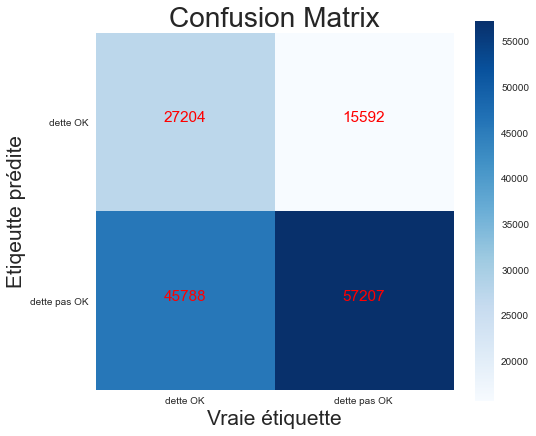

In [10]:
print_confusion_matrix( metrics.confusion_matrix( Y_test , model_Gaussian_naive_bayse.predict(X_test)) , class_names=["dette OK","dette pas OK"] , cmap="hot")

In [11]:
print(  metrics.classification_report(Y_test , model_Gaussian_naive_bayse.predict(X_test))  )

              precision    recall  f1-score   support

         0.0       0.64      0.37      0.47     72992
         1.0       0.56      0.79      0.65     72799

    accuracy                           0.58    145791
   macro avg       0.60      0.58      0.56    145791
weighted avg       0.60      0.58      0.56    145791



## <strong> NBC : Multinomial Naive Bayse Classifier </strong>

In [12]:
model_Multinomial_naive_bayse = MultinomialNB(alpha=0.0)

In [13]:
i = time.time()
print("Entrainement du modèle de NB en cours . . .")
model_Multinomial_naive_bayse.fit(X_train, Y_train)
print(f"\nFin de l'entrainement du modèle.\nDurée d'entrainement : {round(time.time()-i,2)} s" )

Entrainement du modèle de NB en cours . . .

Fin de l'entrainement du modèle.
Durée d'entrainement : 0.22 s


<strong > score du modèle </strong>

In [14]:
model_Multinomial_naive_bayse.score(X_train, Y_train)

0.5473527328098865

In [15]:
model_Multinomial_naive_bayse.score(X_test, Y_test)

0.5445397864065683

<strong> matrice de confusion </strong>

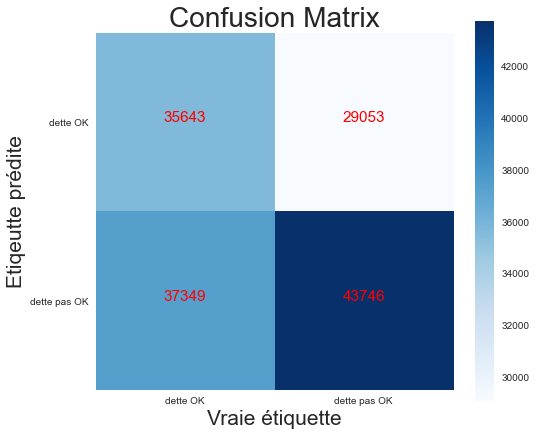

In [16]:
print_confusion_matrix( metrics.confusion_matrix( Y_test , model_Multinomial_naive_bayse.predict(X_test)) , class_names=["dette OK","dette pas OK"],cmap="hot")

In [17]:
print(  metrics.classification_report(Y_test , model_Multinomial_naive_bayse.predict(X_test))  )

              precision    recall  f1-score   support

         0.0       0.55      0.49      0.52     72992
         1.0       0.54      0.60      0.57     72799

    accuracy                           0.54    145791
   macro avg       0.55      0.54      0.54    145791
weighted avg       0.55      0.54      0.54    145791



## <strong> SVM : Support Vector Machin </strong>

In [18]:
model_SVM = svm.SVC(C = 1.e-3 , tol= 1.e-5 , max_iter= 400 , kernel="rbf" , verbose = True, degree=X_train.shape[1])   #kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [19]:
i = time.time()
print("Entrainement du modèle de SVM en cours . . .")
model_SVM.fit(X_train , Y_train)
print(f"\nFin de l'entrainement du modèle.\nDurée d'entrainement : {round(time.time()-i,2)} s" )

Entrainement du modèle de SVM en cours . . .
[LibSVM]
Fin de l'entrainement du modèle.
Durée d'entrainement : 44.15 s


<strong > score du modèle </strong>

In [20]:
model_SVM.score(X_train, Y_train)

0.530705712547144

In [21]:
model_SVM.score(X_test, Y_test)

0.5287363417494907

<strong> matrice de confusion </strong>

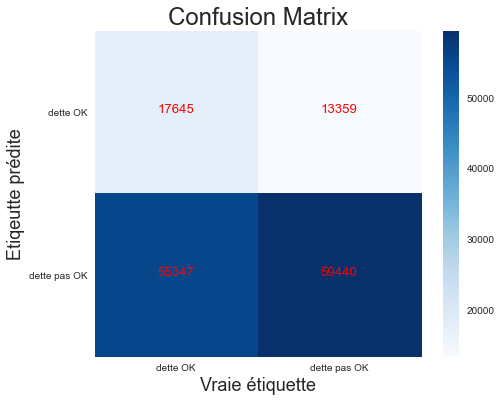

In [22]:
print_confusion_matrix( metrics.confusion_matrix( Y_test , model_SVM.predict(X_test)) , figsize=(8,6) , class_names=["dette OK","dette pas OK"],cmap="hot")

In [23]:
print(  metrics.classification_report(Y_test , model_SVM.predict(X_test))  )

              precision    recall  f1-score   support

         0.0       0.57      0.24      0.34     72992
         1.0       0.52      0.82      0.63     72799

    accuracy                           0.53    145791
   macro avg       0.54      0.53      0.49    145791
weighted avg       0.54      0.53      0.49    145791



## <strong> Decision tree Algorithm </strong>

In [24]:
model_Decision_Tree = DecisionTreeClassifier()

In [25]:
model_Decision_Tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [26]:
prediction_Decision_Tree = model_Decision_Tree.predict(X_test)

In [27]:
model_Decision_Tree.score(X_train, Y_train)

1.0

In [28]:
model_Decision_Tree.score(X_test,Y_test)

0.905728062774794

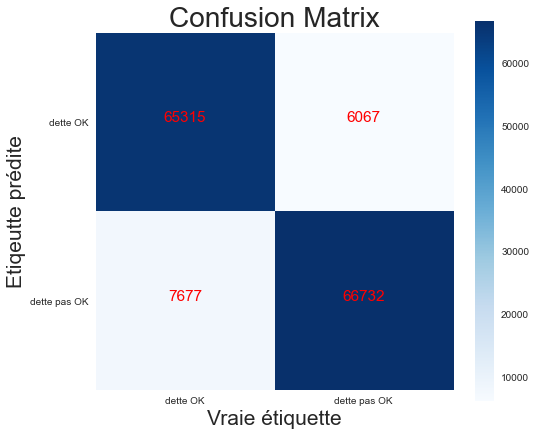

In [29]:
print_confusion_matrix( metrics.confusion_matrix( Y_test , model_Decision_Tree.predict(X_test)) , class_names=["dette OK","dette pas OK"],cmap="hot")

In [30]:
print(  metrics.classification_report(Y_test , model_Decision_Tree.predict(X_test)) )

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90     72992
         1.0       0.90      0.92      0.91     72799

    accuracy                           0.91    145791
   macro avg       0.91      0.91      0.91    145791
weighted avg       0.91      0.91      0.91    145791



## <strong> Random Forest </strong>model_Decision_Tree

In [31]:
model_Random_Forest = RandomForestClassifier( n_jobs=os.cpu_count() )

In [32]:
model_Random_Forest.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=8)

In [33]:
prediction_Random_Forest = model_Random_Forest.predict(X_test)

In [34]:
model_Random_Forest.score(X_train, Y_train)

1.0

In [35]:
model_Random_Forest.score(X_test,Y_test)

0.9574322146085835

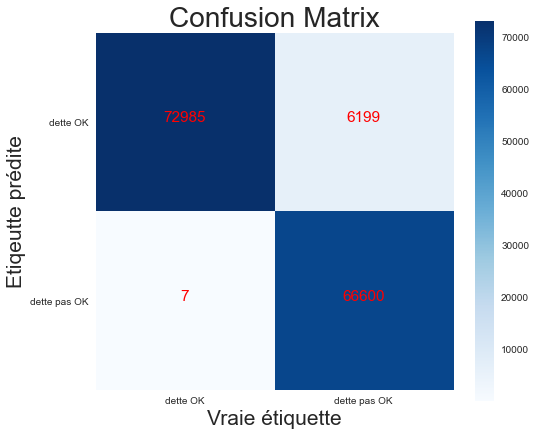

In [36]:
print_confusion_matrix( metrics.confusion_matrix( Y_test , model_Random_Forest.predict(X_test)) , class_names=["dette OK","dette pas OK"],cmap="hot")

In [37]:
print(  metrics.classification_report(Y_test , model_Random_Forest.predict(X_test))  )

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     72992
         1.0       1.00      0.91      0.96     72799

    accuracy                           0.96    145791
   macro avg       0.96      0.96      0.96    145791
weighted avg       0.96      0.96      0.96    145791



## <strong >XGBOOST </strong>

In [38]:
import xgboost as xgb

In [39]:
model_xgb = xgb.XGBClassifier( n_jobs = os.cpu_count() , objective="binary:logistic")

In [40]:
model_xgb .fit(X_train , Y_train)

[23:03:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
Y_proba_XGB = model_xgb .predict_proba(X_test)[:,1]

In [42]:
metrics.accuracy_score(Y_train , model_xgb.predict(X_train))

0.9605415940337644

In [43]:
metrics.accuracy_score(Y_test , prediction_function_threshold(Y_proba = Y_proba_XGB))

0.9569863709008101

In [44]:
metrics.precision_score(Y_test , prediction_function_threshold(Y_proba = Y_proba_XGB))

0.995575221238938

In [45]:
metrics.recall_score(Y_test , prediction_function_threshold(Y_proba = Y_proba_XGB))

0.9179384332202365

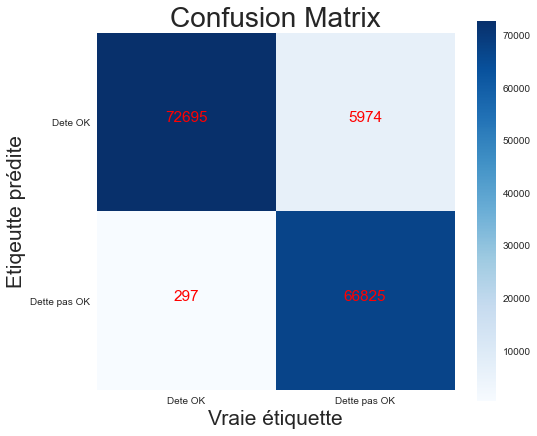

In [46]:
print_confusion_matrix( metrics.confusion_matrix( Y_test , prediction_function_threshold(Y_proba = Y_proba_XGB)) , class_names=["Dete OK", "Dette pas OK"] )

##  <strong>Regression logistique </strong>

In [47]:
print("Initialisation du modèle de regression logistique en cours . . .")
model_Logistic_Regression = LogisticRegression( n_jobs=os.cpu_count() , verbose = 5 , solver='liblinear' ,C=5.5)  #solver : {'newton-cg','lbfgs','liblinear','sag','saga'}
print("Fin de l'initialisation du modèle.")

Initialisation du modèle de regression logistique en cours . . .
Fin de l'initialisation du modèle.


In [48]:
i = time.time()
print("Entrainement du modèle de Regression logistique en cours . . .")
model_Logistic_Regression.fit(X_train , Y_train)
print(f"\nFin de l'entrainement du modèle.\nDurée d'entrainement : {round(time.time()-i,2)} s" )

Entrainement du modèle de Regression logistique en cours . . .
[LibLinear]
Fin de l'entrainement du modèle.
Durée d'entrainement : 23.01 s


<strong > score du modèle </strong>

In [49]:
model_Logistic_Regression.score( X_train, Y_train )

0.5589994738095309

In [50]:
model_Logistic_Regression.score(X_test, Y_test)

0.5570920015638825

In [51]:
prediction_logistic_regression = model_Logistic_Regression.predict(X_test)

<strong> matrice de confusion </strong>

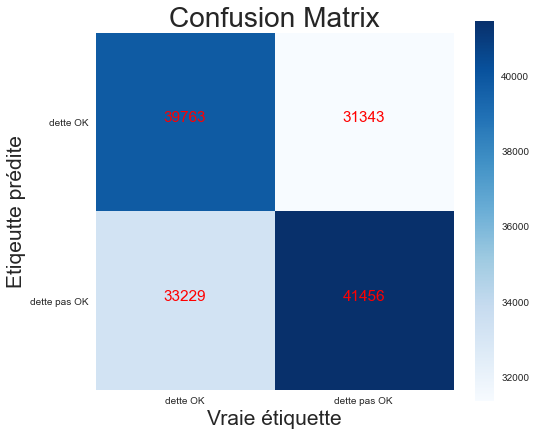

In [52]:
print_confusion_matrix( metrics.confusion_matrix( Y_test , model_Logistic_Regression.predict(X_test))  , class_names=["dette OK","dette pas OK"],cmap="hot")

<strong> Coefficients du modèle de Regression Logistique  </strong>

In [53]:
print(  metrics.classification_report(Y_test , model_Logistic_Regression.predict(X_test))  )

              precision    recall  f1-score   support

         0.0       0.56      0.54      0.55     72992
         1.0       0.56      0.57      0.56     72799

    accuracy                           0.56    145791
   macro avg       0.56      0.56      0.56    145791
weighted avg       0.56      0.56      0.56    145791



## <strong> KNN classifier </strong>


svm.SVC(verbose = True) :   {} ,
KNeighborsClassifier(n_jobs=os.cpu_count() , verbose = True) :  {}   ,

## <strong>  ROC   -   AUC </strong>

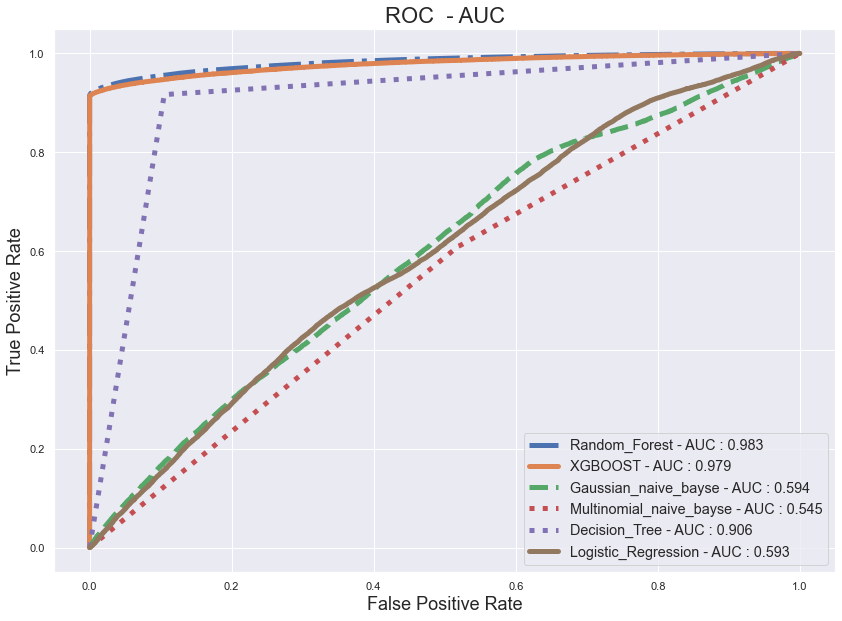

In [54]:
models = { "Random_Forest":model_Random_Forest , "XGBOOST" : model_xgb, "Gaussian_naive_bayse":model_Gaussian_naive_bayse ,  "Multinomial_naive_bayse":model_Multinomial_naive_bayse ,
           "Decision_Tree" :model_Decision_Tree , "Logistic_Regression":model_Logistic_Regression }

plt.figure(figsize=(14,10))
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC  - AUC', fontsize=22)
for i , _ in models.items() :
    try :
        Tpr , Fpr , _ = metrics.roc_curve( Y_test , models[i].predict_proba(X_test)[:,1] )
        AUC = round(metrics.auc(Tpr , Fpr) , 3 )
    except :
        continue
    plt.plot( Tpr , Fpr  ,  lw = 5 , ls = np.random.choice(["dashed","dotted", "dashdot", "solid"]),  label=f"{i} - AUC : {AUC}")
    
plt.legend(loc="best", fontsize = "large")
plt.show()

Le meilleur algorithme serait dont <strong>la forêt aléatoire-  Random forest </strong>

## <strong> GRID search CV </strong>

## <strong> Grid search  : Gaussian naive bayse </strong>

In [55]:
"""total_score = []

model_params = { "Gaussian Naive Bayse" : {"model" : GaussianNB() ,
                                           "params" : {"var_smoothing" : [ 0.5e-6 , 1.e-7 , 1.5e-7 ]} 
                                          }
                }

for model_name , model_params in model_params.items() :
    grid_cv = GridSearchCV(model_params["model"] , model_params["params"] , cv=30,return_train_score=False )
    grid_cv.fit(X_train , Y_train)
    total_score.append({
                        "modèle" : model_name ,
                        "Meilleur score" : grid_cv.best_score_ ,
                        "Meilleurs paramètres" : grid_cv.best_params_ ,
                        })

pd_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])
pd_recap"""

'total_score = []\n\nmodel_params = { "Gaussian Naive Bayse" : {"model" : GaussianNB() ,\n                                           "params" : {"var_smoothing" : [ 0.5e-6 , 1.e-7 , 1.5e-7 ]} \n                                          }\n                }\n\nfor model_name , model_params in model_params.items() :\n    grid_cv = GridSearchCV(model_params["model"] , model_params["params"] , cv=30,return_train_score=False )\n    grid_cv.fit(X_train , Y_train)\n    total_score.append({\n                        "modèle" : model_name ,\n                        "Meilleur score" : grid_cv.best_score_ ,\n                        "Meilleurs paramètres" : grid_cv.best_params_ ,\n                        })\n\npd_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])\npd_recap'

	modèle	Gaussian Naive Bayse

    Meilleur score	 0.576829

    Meilleurs paramètres    {'var_smoothing': 1e-07}


## <strong> Grid search  : Multinomial naive bayse </strong>

In [56]:
"""total_score = []

model_params = { "Multinomial Naive Bayse" : { "model" : MultinomialNB()  ,
                                               "params" : {"alpha" : np.linspace(-1,1,3) }
                                              } 
                }

for model_name , model_params in model_params.items() :
    grid_cv = GridSearchCV(model_params["model"] , model_params["params"] , cv=6 , return_train_score=False )
    grid_cv.fit(X_train , Y_train)
    total_score.append({
                        "modèle" : model_name ,
                        "Meilleur score" : grid_cv.best_score_ ,
                        "Meilleurs paramètres" : grid_cv.best_params_ ,
                        })

pd_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])
pd_recap"""

'total_score = []\n\nmodel_params = { "Multinomial Naive Bayse" : { "model" : MultinomialNB()  ,\n                                               "params" : {"alpha" : np.linspace(-1,1,3) }\n                                              } \n                }\n\nfor model_name , model_params in model_params.items() :\n    grid_cv = GridSearchCV(model_params["model"] , model_params["params"] , cv=6 , return_train_score=False )\n    grid_cv.fit(X_train , Y_train)\n    total_score.append({\n                        "modèle" : model_name ,\n                        "Meilleur score" : grid_cv.best_score_ ,\n                        "Meilleurs paramètres" : grid_cv.best_params_ ,\n                        })\n\npd_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])\npd_recap'

	modèle	Multinomial Naive Bayse
    
    Meilleur score	0.547971
    
    Meilleurs paramètres 	{'alpha': 0.0}


## <strong> Grid search  : Regression logistique </strong>

In [57]:
"""total_score = []

model_params = { "Logistic regression" : { "model" : LogisticRegression( solver = "liblinear", n_jobs = os.cpu_count(), verbose = True) ,
                                           "params" : { "C" :np.linspace(1.,10.,3) }
                                         }  
                }

for model_name , model_params in model_params.items() :
    grid_cv = GridSearchCV(model_params["model"] , model_params["params"] , cv=4 , return_train_score=False )
    grid_cv.fit(X_train , Y_train)
    total_score.append({
                        "modèle" : model_name ,
                        "Meilleur score" : grid_cv.best_score_ ,
                        "Meilleurs paramètres" : grid_cv.best_params_ ,
                        })

pd_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])
pd_recap"""

'total_score = []\n\nmodel_params = { "Logistic regression" : { "model" : LogisticRegression( solver = "liblinear", n_jobs = os.cpu_count(), verbose = True) ,\n                                           "params" : { "C" :np.linspace(1.,10.,3) }\n                                         }  \n                }\n\nfor model_name , model_params in model_params.items() :\n    grid_cv = GridSearchCV(model_params["model"] , model_params["params"] , cv=4 , return_train_score=False )\n    grid_cv.fit(X_train , Y_train)\n    total_score.append({\n                        "modèle" : model_name ,\n                        "Meilleur score" : grid_cv.best_score_ ,\n                        "Meilleurs paramètres" : grid_cv.best_params_ ,\n                        })\n\npd_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])\npd_recap'

	modèle  	  Logistic regression

    Meilleur score		0.565968

    Meilleurs paramètres 	  {'C': 5.5}

## <strong> Random Forest </strong>

In [58]:
# Construction de mon score de cout
my_scorer = metrics.make_scorer( my_cost , scorer = True , greater_is_better=False , needs_proba= False ,needs_threshold=True)
index = random.sample( list(X_train.index) , X_train.shape[0]//3 )
total_score = [  ]


model_params = { "Random Forest" : { "model" : RandomForestClassifier(n_jobs=os.cpu_count() ,verbose = False ) ,
                                     "params" : { "n_estimators" : [100 , 200 , 300, 400] }
                                         }  
                }

for model_name , model_params in model_params.items() :
    grid_cv = GridSearchCV( model_params["model"] , param_grid=model_params["params"], return_train_score=True, error_score='raise' , cv=4 , scoring = my_scorer )
    grid_cv.fit(X_train.loc[index,:] , Y_train.loc[index,:])
    grid_cv.cv_results_
    total_score.append({
                        "modèle" : model_name ,
                        "Meilleur score" : grid_cv.best_score_ ,
                        "Meilleurs paramètres" : grid_cv.best_params_ ,
                        })

pd_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])
pd_recap

,modèle,Meilleur score,Meilleurs paramètres
0,Random Forest,-0.149462,{'n_estimators': 300}


In [59]:
model_Random_Forest = grid_cv.best_estimator_

In [60]:
grid_cv.cv_results_

{'mean_fit_time': array([11.95219731, 21.18133396, 32.32067531, 41.74301332]),
 'std_fit_time': array([1.00803282, 0.73867804, 2.01575845, 1.69128759]),
 'mean_score_time': array([2.60083264, 2.70430177, 3.10977048, 3.24503517]),
 'std_score_time': array([0.14114305, 0.04677529, 0.2526058 , 0.13871685]),
 'param_n_estimators': masked_array(data=[100, 200, 300, 400],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 400}],
 'split0_test_score': array([-0.15245688, -0.14875304, -0.14903524, -0.14758898]),
 'split1_test_score': array([-0.15493156, -0.15288557, -0.15045153, -0.15182729]),
 'split2_test_score': array([-0.15412022, -0.14865246, -0.1491816 , -0.14995767]),
 'split3_test_score': array([-0.15433188, -0.15052208, -0.1491816 , -0.14995767]),
 'mean_test_score': array([-0.15396013, -0.15020329, -0.14946249, -0.1498329 ]),
 'std_

In [61]:
Y_prob_RF = grid_cv.best_estimator_.predict_proba(X_test)[:,1]

## <strong> représentation graphique de la variation de scores en fonction du seuil pour le modele d'arbres aléatoires

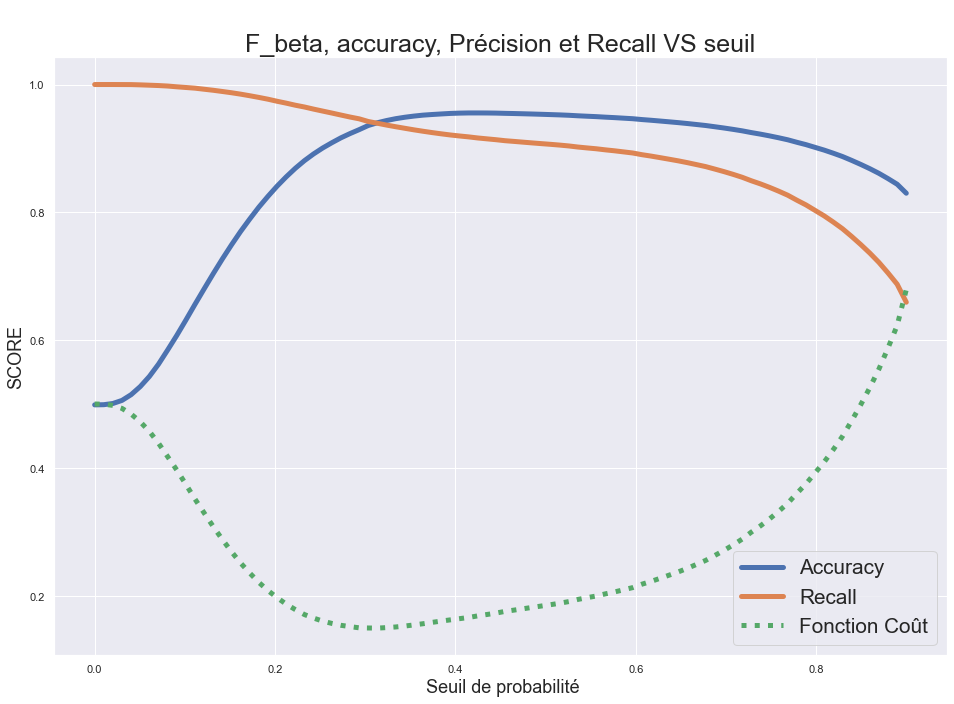

In [62]:
scores = print_scores(Y_proba = Y_prob_RF , Y_true = Y_test , line_width = 5 , give_results=True , plot_kind="rca")

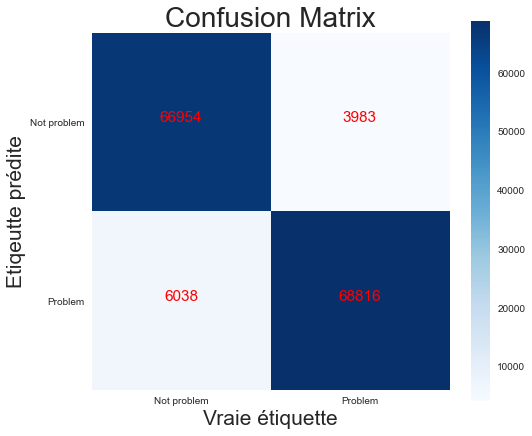

In [63]:
# construction de la prédiction du modèle optimisé
Y_predict_proba = prediction_function_threshold ( Y_proba= Y_prob_RF , seuil = my_cost(Y_test , Y_prob_RF ,poids= 4.5 )["seuil_min"] )

# Affichage de la matrice de confusion.
print_confusion_matrix(metrics.confusion_matrix(Y_test , Y_predict_proba), class_names=[ "Not problem" , "Problem"])

## <strong> XGBOOST classifier </strong>

In [64]:
# Construction de mon score de cout
index = random.sample( list(X_train.index) , X_train.shape[0]//3 )
total_score = []


model_params = { "XGBOOSTClassifier" : { "model" : xgb.XGBClassifier(n_jobs=os.cpu_count() ,verbose = False , verbosity = 0 ) ,
                                     "params" : { "n_estimators" : [100 , 200 , 300, 400] }
                                         }  
                }

for model_name , model_params in model_params.items() :
    grid_cv = GridSearchCV( model_params["model"] , param_grid=model_params["params"], return_train_score=True, error_score='raise' , cv=4 , scoring = my_scorer )
    grid_cv.fit(X_train.loc[index,:] , Y_train.loc[index,:])
    grid_cv.cv_results_
    total_score.append({
                        "modèle" : model_name ,
                        "Meilleur score" : grid_cv.best_score_ ,
                        "Meilleurs paramètres" : grid_cv.best_params_ ,
                        })

pd_recap = pd.DataFrame(total_score , columns=["modèle","Meilleur score","Meilleurs paramètres"])
pd_recap

,modèle,Meilleur score,Meilleurs paramètres
0,XGBOOSTClassifier,-0.157435,{'n_estimators': 100}


In [65]:
model_xgb = grid_cv.best_estimator_

In [66]:
grid_cv.cv_results_

{'mean_fit_time': array([22.5024128 , 45.7021696 , 66.04994839, 87.58100998]),
 'std_fit_time': array([1.16552871, 1.93017382, 1.40769507, 1.62611706]),
 'mean_score_time': array([2.37476569, 2.509372  , 2.38021141, 2.49525243]),
 'std_score_time': array([0.03858361, 0.18847038, 0.0366544 , 0.12246168]),
 'param_n_estimators': masked_array(data=[100, 200, 300, 400],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 400}],
 'split0_test_score': array([-0.15668983, -0.15630181, -0.15418533, -0.15774807]),
 'split1_test_score': array([-0.16128122, -0.16417384, -0.16621984, -0.16516156]),
 'split2_test_score': array([-0.15514322, -0.1573656 , -0.15754198, -0.15800056]),
 'split3_test_score': array([-0.15662481, -0.15775363, -0.16089318, -0.16001129]),
 'mean_test_score': array([-0.15743477, -0.15889872, -0.15971008, -0.16023037]),
 'std_

In [67]:
Y_prob_XG = model_xgb.predict_proba(X_test)[:,1]

## <strong> représentation graphique de la variation de scores en fonction du seuil pour le modele d'arbres aléatoires

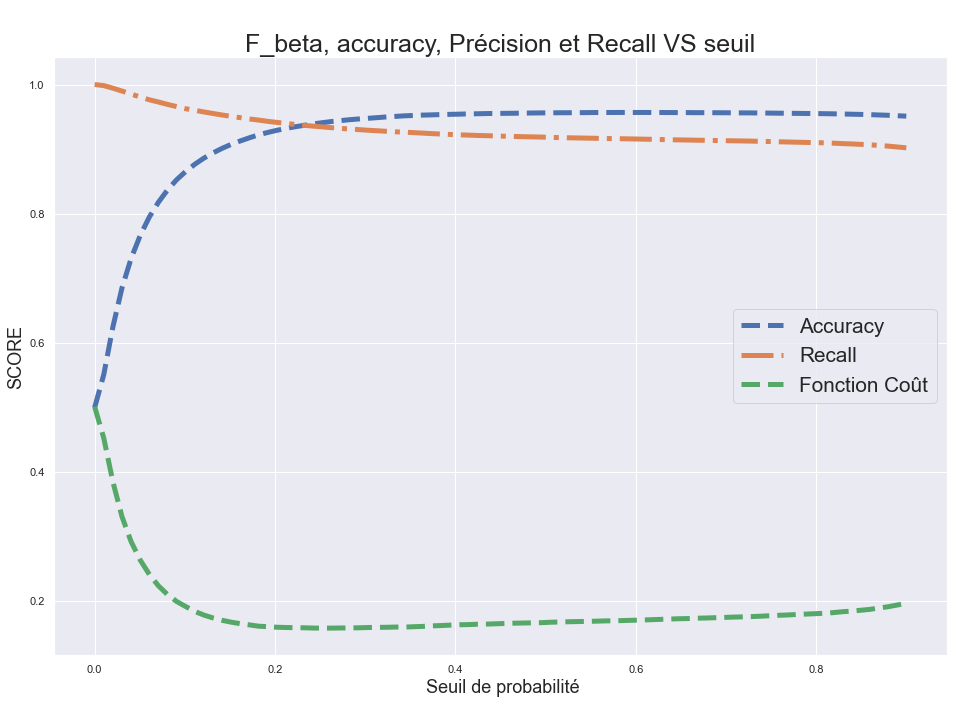

In [68]:
scores = print_scores(Y_proba = Y_prob_XG , Y_true = Y_test , line_width = 5 , give_results=True , plot_kind="rac")

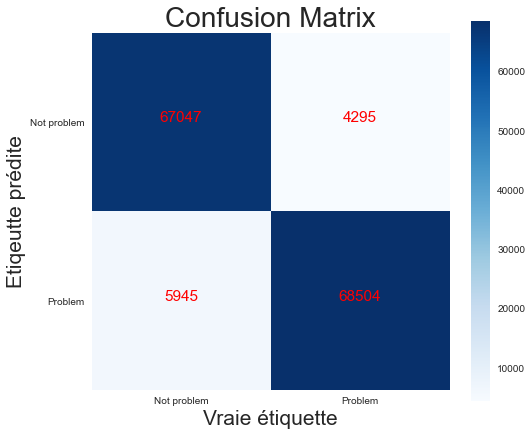

In [69]:
# construction de la prédiction du modèle optimisé
Y_predict_proba_XG = prediction_function_threshold ( Y_proba= Y_prob_XG , seuil = my_cost(Y_test , Y_prob_XG ,poids= 4.5 )["seuil_min"] )

# Affichage de la matrice de confusion.
print_confusion_matrix(metrics.confusion_matrix(Y_test , Y_predict_proba_XG), class_names=[ "Not problem" , "Problem"])

## <strong> représentation graphique de la variation de scores en fonction du seuil pour le modele XGBOOST

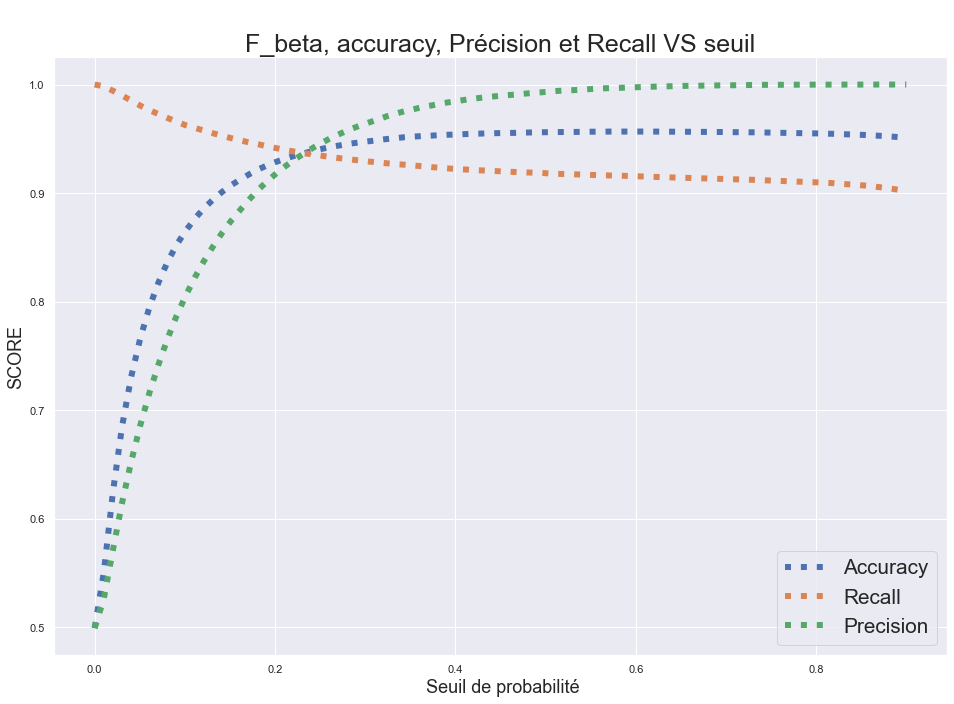

In [70]:
print_scores(model_xgb , X_test , Y_test )

## <strong> représentation graphique de la variation de scores en fonction du seuil pour le modele de regrassion logistique

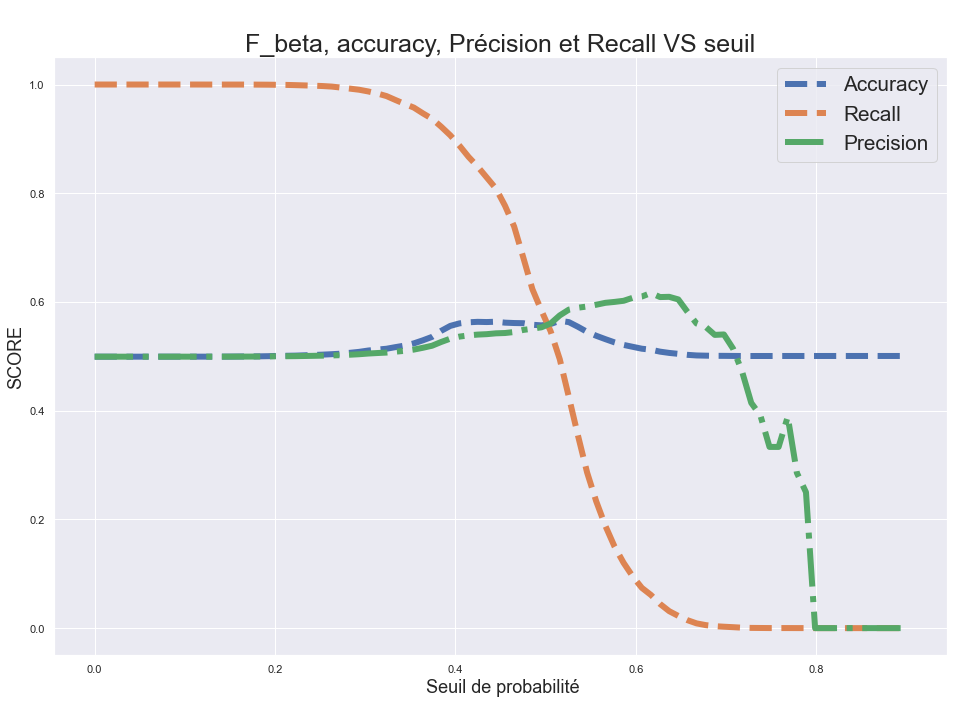

In [71]:
try :
    print_scores(model_Logistic_Regression , X_test , Y_test )
except :
    print("Petite erreur")

## <strong> représentation graphique de la variation de scores en fonction du seuil pour le modele Gaussien de bayse naif

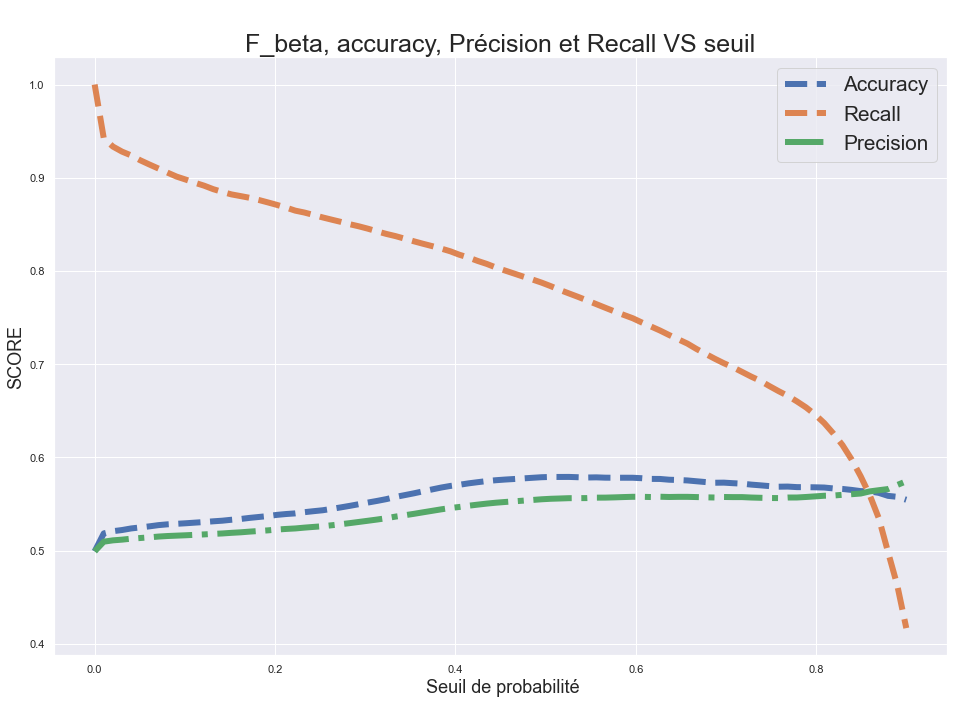

In [72]:
try :
    print_scores(model_Gaussian_naive_bayse , X_test , Y_test )
except :
    print("Petite erreur")

In [73]:
Y_proba_GNB = model_Gaussian_naive_bayse.predict_proba(X_test)[:,1]
Y_proba_MNB = model_Multinomial_naive_bayse.predict_proba(X_test)[:,1]
Y_proba_LR = model_Logistic_Regression.predict_proba(X_test)[:,1]
Y_proba_DT = model_Decision_Tree.predict_proba(X_test)[:,1]

## Représentation du coût métier en fonction du seuil de probabilité pour différents modèle

In [74]:
seuil = np.linspace(0,1,100)

prob_dict = {"XGBOOST":Y_proba_XGB,"Random Forest":Y_prob_RF,"Decision Tree":Y_proba_DT,"Gaussian NB":Y_proba_GNB,"Multinomial NB":Y_proba_MNB,"Logistic Regression":Y_proba_LR}
cout_dict = {}
for name in prob_dict.keys() :
    cout_dict[name] = my_cost(Y_test , prob_dict[name] , seuil=seuil , scorer=False)

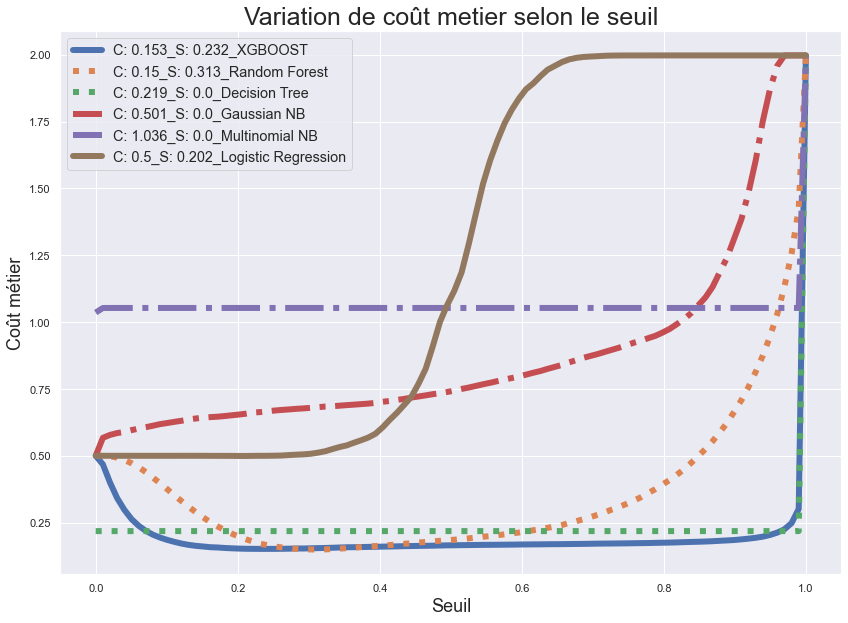

In [75]:
plt.figure(figsize=(14,10))
for name in cout_dict.keys():
    plt.plot(seuil , cout_dict[name]['cout']  , lw = 6 ,ls = np.random.choice(["dashed","dotted", "dashdot", "solid"]), label = f"C: {round(cout_dict[name]['cout_min'],3)}_S: {round(cout_dict[name]['seuil_min'][0],3)}_{name}" )

plt.xlabel("Seuil" , size=18)
plt.ylabel("Coût métier", size=18)
plt.title("Variation de coût metier selon le seuil", size=25)
plt.legend(loc="best" , fontsize="larger")
plt.show()

## <strong> Recapitulatif des scores pour chaque modèle  </strong>

In [76]:
a = { "Precision" : [metrics.precision_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_XGB)) ,metrics.precision_score(Y_test, prediction_function_threshold(Y_proba=Y_prob_RF)),
                    metrics.precision_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_DT )) ,metrics.precision_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_GNB )),
                    metrics.precision_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_MNB )) ,metrics.precision_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_LR ))] ,
     
     "Recall" : [metrics.recall_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_XGB)) ,metrics.recall_score(Y_test, prediction_function_threshold(Y_proba=Y_prob_RF)),
                    metrics.recall_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_DT )) ,metrics.recall_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_GNB )),
                    metrics.recall_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_MNB )) ,metrics.recall_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_LR )) ] , 
     
     "Accuracy" : [metrics.accuracy_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_XGB)) ,metrics.accuracy_score(Y_test, prediction_function_threshold(Y_proba=Y_prob_RF)),
                    metrics.accuracy_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_DT )) ,metrics.accuracy_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_GNB )),
                    metrics.accuracy_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_MNB )) ,metrics.accuracy_score(Y_test, prediction_function_threshold(Y_proba=Y_proba_LR ))] ,
     
     "Cout" : [my_cost(Y_test, prediction_function_threshold(Y_proba=Y_proba_XGB) , scorer=True) , my_cost(Y_test, prediction_function_threshold(Y_proba=Y_prob_RF) , scorer=True),
              my_cost(Y_test, prediction_function_threshold(Y_proba=Y_proba_DT) , scorer=True) , my_cost(Y_test, prediction_function_threshold(Y_proba=Y_proba_GNB) , scorer=True),
              my_cost(Y_test, prediction_function_threshold(Y_proba=Y_proba_MNB) , scorer=True) , my_cost(Y_test, prediction_function_threshold(Y_proba=Y_proba_LR) , scorer=True) ]
    
    }

In [102]:
summury_df = pd.DataFrame(a )

idx = pd.Index(["XGBOOST" , "Random Forest", "Decision Tree","Gaussian Naive Bayse","Multinomial Naive Bayse", "Logistic Regression"])
summury_df = summury_df.set_index(idx)
summury_df.style.highlight_max(axis = 0 , color = 'green').highlight_min(axis = 0 , color="red" )

,Precision,Recall,Accuracy,Cout
XGBOOST,0.995575,0.917938,0.956986,0.165943
Random Forest,0.999243,0.906784,0.953111,0.186527
Decision Tree,0.896827,0.916661,0.905728,0.219115
Gaussian Naive Bayse,0.555435,0.785821,0.578986,0.741856
Multinomial Naive Bayse,0.539441,0.600915,0.544540,1.053295
Logistic Regression,0.555078,0.569458,0.557092,1.087866


## <strong>Variation du Cout métier en fonction du seuil de probabilité pour chaque modèle  </strong>

In [89]:
scores = {"XGBOOST": my_cost(Y_test, Y_proba_XGB , scorer=False), "Random Forest":my_cost(Y_test, Y_prob_RF , scorer=False),"Decision Tree":my_cost(Y_test, Y_proba_DT , scorer=False),
          "Gaussian Naive Bayse":my_cost(Y_test, Y_proba_GNB , scorer=False),"Multinomial Naive Bayse":my_cost(Y_test, Y_proba_MNB , scorer=False),
          "Logistic Regression":my_cost(Y_test, Y_proba_LR , scorer=False)}

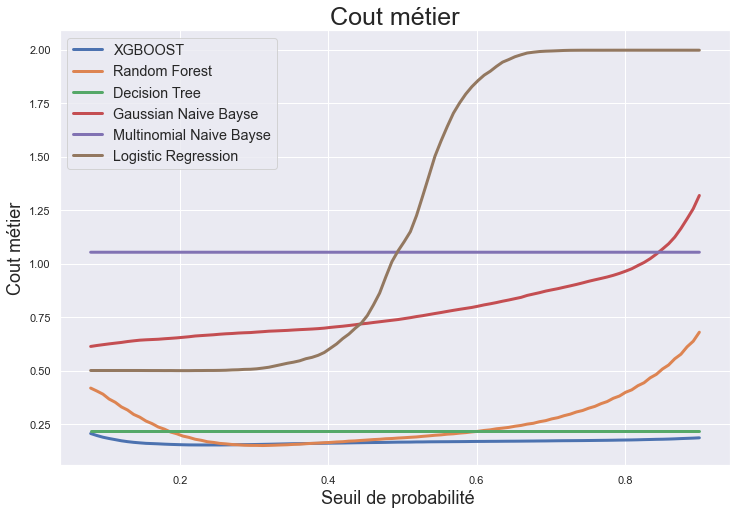

In [105]:
seuil = np.linspace(0.08,0.9,100)
#  Affichage de la figure
plt.figure(figsize=(12,8))
plt.title("Cout métier" , size=25)
plt.xlabel(" Seuil de probabilité" , size= 18)
plt.ylabel("Cout métier" , size = 18)

for label , y  in scores.items()  :
    plt.plot(seuil , y["cout"] , lw = 3 , label = f"{label}")

plt.legend(loc="best" , fontsize="large")
plt.show()

## <strong>  ROC   -   AUC </strong>

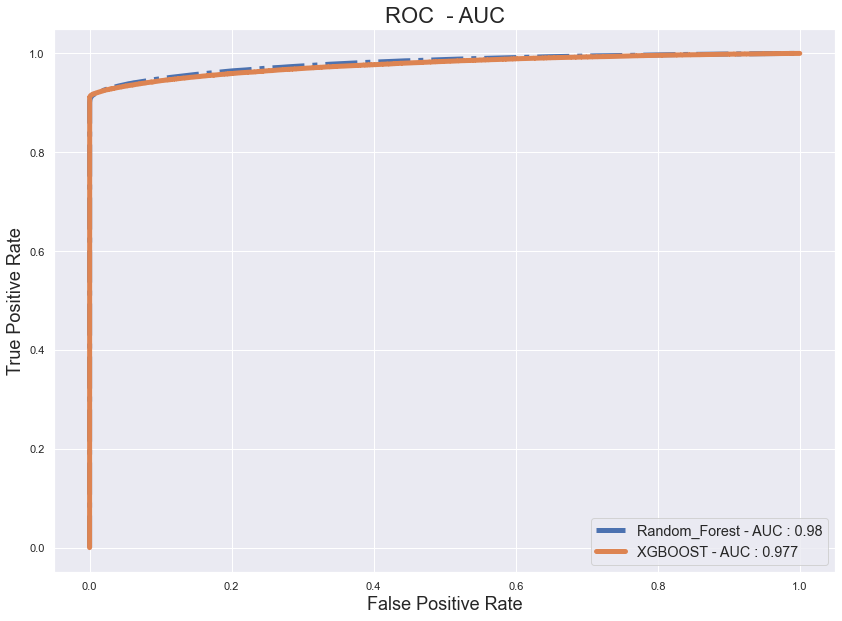

In [78]:
models = {  "Random_Forest":model_Random_Forest , "XGBOOST" : model_xgb}  # "Decision_Tree" :model_Decision_Tree , "Logistic_Regression":model_Logistic_Regression ,

plt.figure(figsize=(14,10))
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC  - AUC', fontsize=22)
for i , _ in models.items() :
    try :
        Tpr , Fpr , _ = metrics.roc_curve( Y_test , models[i].predict_proba(X_test)[:,1] )
        AUC = round(metrics.auc(Tpr , Fpr) , 3 )
    except :
        continue
    plt.plot( Tpr , Fpr  ,  lw = 5 , ls = np.random.choice(["dashed","dotted", "dashdot", "solid"]),  label=f"{i} - AUC : {AUC}")
    
plt.legend(loc="best", fontsize = "large")
plt.show()

## Sauvegarde du meilleur modèle

In [79]:
joblib.dump( model_xgb ,"model_XGBOOST.sav" )

['model_XGBOOST.sav']